<img src="https://www.dropbox.com/s/fchpltm5rnwd5ce/Flatiron%20Logo%202Wordmark.png?raw=1" width=100 >

# My Flatiron Bootcamp Notes  - Mod 3
- James M. Irving, Ph.D.
- james.irving.phd@gmail.com
- Repo:  https://github.com/jirvingphd/my_data_science_notes

- Previous Notebook
    - **[My Flatiron Bootcamp Notes - Mods1&2](https://drive.google.com/open?id=1iREMcqkWK_MrwIEEMg8fwb32xk-d319o)**


# QUICK REFERENCE

### Additional Pandas Time Series Tips / Guide



- You can round timestamps to a specific frequency by using `ts.round('D')` where D can be any of the time frequency codes

- **Date time data types**

|Concept	|Scalar Class	|Array Class	|pandas Data Type|	Primary Creation Method|
|------|------|------|----|---|
|Date times|	Timestamp	|DatetimeIndex	|datetime64[ns] or datetime64[ns, tz]| to_datetime or date_range|
|Time deltas	|Timedelta|	TimedeltaIndex|	timedelta64[ns]|	to_timedelta or timedelta_range|
|Time spans|	Period|	PeriodIndex|	period[freq]|	Period or period_range|
|Date offsets|	DateOffset	|None|	None|	DateOffset|


- **Pandas Frequency Abbreviations**

|Alias|	Description|
|----|-----|
|B|	business day frequency|
|C|	custom business day frequency|
|D|	calendar day frequency|
|W|	weekly frequency|
|M|	month end frequency|
|SM|	semi-month end frequency (15th and end of month)|
|BM|	business month end frequency|
|CBM|	custom business month end frequency|
|MS|	month start frequency|
|SMS|	semi-month start frequency (1st and 15th)|
|BMS|	business month start frequency|
|CBMS|	custom business month start frequency|
|Q|	quarter end frequency|
|BQ|	business quarter end frequency|
|QS|	quarter start frequency|
|BQS|	business quarter start frequency|
|A|, Y	year end frequency|
|BA|, BY	business year end frequency|
|AS|, YS	year start frequency|
|BAS|, BYS	business year start frequency|
|BH|	business hour frequency|
|H|	hourly frequency|
|T|, min	minutely frequency|
|S|	secondly frequency|
|L|, ms	milliseconds|
|U|, us	microseconds|
|N|	nanoseconds|

- **Time/data properties of Timestamps**

|Property|	Description|
|---|---|
|year|	The year of the datetime|
|month|	The month of the datetime|
|day|	The days of the datetime|
|hour|	The hour of the datetime|
|minute|	The minutes of the datetime|
|second|	The seconds of the datetime|
|microsecond|	The microseconds of the datetime|
|nanosecond|	The nanoseconds of the datetime|
|date|	Returns datetime.date (does not contain timezone information)|
|time|	Returns datetime.time (does not contain timezone information)|
|timetz|	Returns datetime.time as local time with timezone information|
|dayofyear|	The ordinal day of year|
|weekofyear|	The week ordinal of the year|
|week|	The week ordinal of the year|
|dayofweek|	The number of the day of the week with Monday=0, Sunday=6|
|weekday|	The number of the day of the week with Monday=0, Sunday=6|
|weekday_name|	The name of the day in a week (ex: Friday)|
|quarter|	Quarter of the date: Jan-Mar = 1, Apr-Jun = 2, etc.|
|days_in_month|	The number of days in the month of the datetime|
|is_month_start|	Logical indicating if first day of month (defined by frequency)|
|is_month_end|	Logical indicating if last day of month (defined by frequency)|
|is_quarter_start|	Logical indicating if first day of quarter (defined by frequency)|
|is_quarter_end|	Logical indicating if last day of quarter (defined by frequency)|
|is_year_start|	Logical indicating if first day of year (defined by frequency)|
|is_year_end|	Logical indicating if last day of year (defined by frequency)|
|is_leap_year|	Logical indicating if the date belongs to a leap year|



### RANDOM NOTES ON NUMBER FORMATTING


- https://pbpython.com/styling-pandas.html
- Reference table for formatting: https://mkaz.blog/code/python-string-format-cookbook/

```python
fmt_price = '${0:,.0f}'
format_dict = {'Predictions': '{:0.2f}',  'Test_values': '{:0.2f}', 
'True Test Price':fmt_price,'True Predictions Price':fmt_price }
df_show.style.format(format_dict).hide_index()
```

### How to turn a google drive share link into a raw-usable one

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

def make_gdrive_file_url(share_url_from_gdrive):
    """accepts gdrive share url with format 'https://drive.google.com/open?id=`
    and returns a pandas-usable link with format ''https://drive.google.com/uc?export=download&id='"""
    import re
    file_id = re.compile(r'id=(.*)')
    fid = file_id.findall(share_url_from_gdrive)
    prepend_url = 'https://drive.google.com/uc?export=download&id='
    output_url = prepend_url + fid[0]
    return output_url 

test_link = "https://drive.google.com/open?id=1eHbOq-2TqGx4d2jZXrUdwNnJY_aM_7rj" # airline passenger .csv
file_link = make_gdrive_file_url(test_link)
file_link

'https://drive.google.com/uc?export=download&id=1eHbOq-2TqGx4d2jZXrUdwNnJY_aM_7rj'

# MOD 3 LEARN.CO TIME SERIES LESSONS 




## Time Series with Pandas
- Converting to datetime, setting index

```python
import pandas as pd
import numpy as np
from pandas.core import datetools

temp_data.Date = pd.to_datetime(temp_data.Date, format='%d/%m/%y')
temp_data.set_index('Date', inplace = True)

```
### Downsampling or upsampling time series

```python

# Downsampling (to larger time unit):
temp_monthly= temp_data.resample('MS') # MS = month start

# Upsampling (to smaller time unit, may cause NaN
temp_bidaily= temp_data.resample('12H').asfreq()

# Fill in emppty time indices:
temp_bidaily_fill= temp_data.resample('12H').ffill() # Forwards fill
temp_bidaily_fill= temp_data.resample('12H').bfill() #Backwards fill

```
### Slicing time series


```python
temp_1985_onwards = temp_data['1985':]
```

### Plotting time series: (ts=time series dataframe)
```python
# Line plot
ts.plot(subplots=True/False)
# Dot plot
ts.plot(style='.b')
# Histogram
ts.hist()
# KDE
ts.plot(kind='kde')
# Box & Whiskers
ts.boxplot()
# Heat maps
year_matrix = nyse_annual.T  # First must transpose.
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.show()
```



## Types of Time Series Trends

- Stationary vs Non-Stationary 

<img src="https://www.dropbox.com/s/utn0m1ry9raefx0/Mean_nonstationary.png?raw=1" width=400>

<img src="https://www.dropbox.com/s/d5o899hhus5ppxx/Var_nonstationary.png?raw=1" width=400>

- Trends can be:
    - Linear
    - Exponential
    - Periodic/seasonal
    - Trends with Increasing/Decreasing Variance
    
<img src="https://www.dropbox.com/s/pfpygr22gnrdz6m/trendseasonal.png?raw=1" width=500>

### Trend detection: Rolling statistics:

    - Moving average/variance calculations using ```.rolling()```

```python
rolmean = ts.rolling(window = 8, center = False).mean()
rolstd = ts.rolling(window = 8, center = False).std()
fig = plt.figure(figsize=(12,7))
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
```
<img src="https://www.dropbox.com/s/n6pfycjt0jntk1l/index_38_0.png?raw=1" width=400>

### Trend detection: Dickey Fuller Test
- [adfuller from statsmodels.tsa.statstools](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)
- The Dickey Fuller Test null hypothesis is that the series is NOT stationary, so a significant result means that it IS stationary. 

```python
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(ts)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

```

### def stationarity_check(): from lessons
```python
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['#Passengers']) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None
```
- [Article on testing for non-stationary](https://machinelearningmastery.com/time-series-data-stationary-python/)




## Eliminating trends

Have several methods for elimianting different trends:

- **Taking the log transformation (or square root, cube root)**
        - `np.log(ts)` or `np.sqrt(ts)`
    - Will make time series more "uniform" over time. 
    - Higher values are penalized more than lower ones. 
- **Subtracting the rolling mean**
    - Calculate the rolling mean ( using.rolling() ) and subtract it from the ts.

```python

rolmean = ts.rolling(window = 4).mean()
ts_diff = ts - rolmean

```
        
- **Weighted rolling mean.**
    - Pandas has Exponentially Weighted Moving Average (ts.ewm())
    - Halflife parameter determines exponentail decay. Can use other parameters like span and center of mass to define decay. 
        - Discussed in [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html)
        
```python
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_rolmean = ts.ewm(halflife = 2).mean()
data_minus_exp_rolmean = ts - exp_rolmean

```

- **Differencing**
    - Common way dealing with both trends and seasonality is differencing.
    - Take the difference between one instant and the previous instant (1-period /first order lag). # of time periods lag = the 'order' of diff. First, second, third, etc. 
    
```python
data_diff = data.diff(periods=365)
```



## Time Series Decomposition
- Turns a time series into multiple different time series. Most often in 3 parts:
    1. Seasonal 
    2. Trend
    3. Random (noise/irregular/remainder/residuals)
    
- Must pick between addititve or multiplicative decomposition:
    - Must analzye time series to help decide:
        - Does the magnitude of seasonality increase or decrease when the time series increases?
    - Statsmodels has seasonal_decompose function. 
    
    <img src="https://www.dropbox.com/s/tapjyzdapa72lfl/mseas.fig1_.png?raw=1">

```python
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(ts))

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
 plt.plot(np.log(ts), label='Original', color="blue")
plt.plot(trend, label='Trend', color="blue")
plt.plot(seasonal,label='Seasonality', color="blue")
plt.plot(residual, label='Residuals', color="blue")
```
<img src="https://www.dropbox.com/s/6dh8ogkytzjreky/index_4_0.png?raw=1" width=500>


- Article on [decomposing time series](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)


### Section 25 Recap
The key takeaways from this section include:
* When you import time series data into Pandas, make sure to use the time/date information as index values using either a Pandas Timestamp or Python DateTime data type
* There are a range of built in functions in Pandas for easily downsampling or upsampling time series data
* Line plots and dot plots can be useful for getting a sense of how a time series data set has changed over time
* Histograms and density plots can be useful for getting a sense of the time independent distribution of a time series data set
* Box and whisker plots per year (or other seasonality period - day, week, month, etc) can be a great way to easily see trends in the distribution of time series data over time
* Heat maps can also be useful for comparing changes of time series data across a couple of dimensions. For example, with months on one axis and years on another they can be a great way to see both seasonality and year on year trends
* A time series is said to be stationary if its statistical properties such as mean and variance remain constant over time
* Most time series models work on the assumption that the time series are stationary (assumption of homoscedasticity)
* Many time series data sets *do* have trends, violating the assumption of homoscedasticity
* Common examples are trends include linear (straight line over time), exponential and periodic. Some data sets also have increasing (or decreasing) variance over time
* Any given data set may exhibit multiple trends (e.g. linear, periodic and reduction in variance)
* Rolling statistics can be used to test for trends to see whether the centrality and/or dispersion of the data set changes over time
* The Dickey Fuller Test is a common test for determining whether a data set contains trends
* Common approaches for removing trends and seasonality include taking a log transform,. subtracting the rolling mean and differencing
* Decomposing allows you to separately view seasonality (which could be daily, weekly, annual, etc), trend and "random" which is the variability in the data set after removing the effects of the seasonality and trend




# 📓 Time Series Models


- Note: for almost all models you need to make time series stationary first.
### White Noise Model
- The white noise model has three properties:
    - Fixed and constant mean
    - Fixed and constant variance
    - No correlation over time 

<img src="https://www.dropbox.com/s/jk1pf891qfs2l4d/index_10_0.png?raw=1" width=400>
    
- Special case is Gaussian White Noise
    - Constant mean = 0
    - Constant variance =1
- [Article on white noise series in python](https://machinelearningmastery.com/white-noise-time-series-python/)

### Random walk model
- Very common in finance (i.e. exchange rates) 
    - Tomorrow's rate is heavily influenced by today's
- Contrary to the white noise model, random walk has:
    - No specific mean or variance.
    - A strong dependence over time. 

- the changes over time are basically a white noise model 

$$Y_t = Y_{t-1} + \epsilon_t$$
where $\epsilon_t$ is a *mean zero* white noise model!

<img src="https://www.dropbox.com/s/cnlyxoos54ztlbx/index_12_0.png?raw=1" width=400>


#### Random Walk with a drift
- The drift (c) steers the model in a certain direction.
$$Y_t = c+ Y_{t-1} + \epsilon_t$$


### Correlation & Autocorrelation

- [Article: "A Gentle Introduction to Autocorrelation and Partial Autocorrelations"](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
)
#### Autocorrelation Function (ACF)
- Autocorrelation exmaines a time series against itself over increasing values of lag.
- Pandas has autocorrelation_plot

```
pd.plotting.autocorrelation_plot(diet)
```

<img src="https://www.dropbox.com/s/e2uknvwydcijqnl/index_33_0%20%282%29.png?raw=1" width=500 >

- Same data, but after removing trends with differencing:

<img src="https://www.dropbox.com/s/88u9r2cvnqrob2n/index_37_1.png?raw=1" width=500>

- Can also plot with statsmodels:.
```python
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diet, lags = 100);
```
<img src="https://www.dropbox.com/s/33llhqo96t8sh3j/index_45_0.png?raw=1" width=500>

#### Partial Autocorrelation Function (PACF)

- Similar to ACF, but it controls for values at shorter labs (which ACF does not).
    - "Summary of tge relationship between a time series element and observations at a lab, _with the relationships of intervening observations removed_."
    - Can be interpreted as a regression of the series against its PAST lags. 
    - Can use to help pick what order of ARF to use in modeling.

Plotted from statsmodels tsaplots:

```python
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
plot_pacf(diet, lags = 100);

```
<img src="https://www.dropbox.com/s/cr7p0o3prwnmqrs/index_42_0.png?raw=1" width=500>

### ARMA Models
- Combination of Autoregressive (AR) model and Moving Average (MA) model.
    - AR: $Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$
    - MA: $Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$

#### The Autoregressive Model
- A value from a time series is regressed on preivous values from same time series.

$$ \text{Today = constant + slope} \times \text{yesterday + noise} $$

Or, mathematically:
$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

$\phi$ is slope. 


- Notes on this formula:
    - If the slope is 0, the ts is a white noise model with mean $\mu$
    - If slope is not 0, the ts is autocorrelated.
    - Bigger slop means bigger autocorrelation
    - Negative slope =  time series follows oscillatory process. 



##### AR Model Time Series (at varying $\phi$)
**AR time series:**

<img src="https://www.dropbox.com/s/k9mnam1wv4eltp2/AR_model.png?raw=1" width =500>

**AR series' ACF:**


<img src="https://www.dropbox.com/s/5ucfnsrlxjev7k8/AR_ACF.png?raw=1" width =500>
> The oscillatory process of the time series with $\phi=0.9$ is clearly reflected in the autocorrelation function, returning an oscillatory autocorrelation function as well. $\phi=0.2$ leads to a very low, insignificant,  autocorrelation. $\phi=0.8$ leads to a strong autocorrelation for the first few lags, and then incurs a steep decline. Having a $\phi=1.02$ (just slightly bigger than 1) leads to strong and longlasting autocorrelation.


**AR series' PACF:**


<img src="https://www.dropbox.com/s/joazuyts1xmqhzh/AR_PACF.png?raw=1" width=500>


> For each of these PACFs, we notice a high value for 1 lag, then autocorrelations of 0, except for the second one. This is no big surprise, as the slope parameter is fairly small, so the relationship between a value and the next one is fairly limited.

#### The Moving Average Model
- The weighted sum of today's and yesterday's noise 

$$ \text{Today = Mean + Noise + Slope} \times \text{yesterday's noise} $$

Or, mathematically:
$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

- Some notes based on this formula:
    - If the slope is 0, the time series is a white noise model with mean $\mu$
    - If the slope is not 0, the time series is autocorrelated and depends on the previous white noise process
    - Bigger slope means bigger autocorrelation
    - When there is a negative slope, the time series follow an oscillatory process

##### MA Model Time Series (at varying $\phi$)
**MA time series:**

<img src="https://www.dropbox.com/s/ic7uzmgtuhdoqu4/MA_model.png?raw=1"  width=500>

>When there is a posivite $\theta$ there is a certain persistence in level, meaning that each observation is generally close to its neighbors. This is more pronounced for higher . values of $\theta$. MA series with negative coefficients, however, show oscillatory patterns. Recall that when $\theta=0$, the process is a true White Noise Process! 


**MA ACF:**

<img src="https://www.dropbox.com/s/fv7sryfxyazve82/MA_ACF.png?raw=1" width=500>

> MA processes have autocorrelations, but because of the structure of the MA formula (regressing it on the noise term of the previous observation) there is **only a dependence for one period, and the autocorrelation is zero for lags 2 and higher.**

> If $\theta >0$ the lag one autocorrelation is positive, if $\theta <0$ the lag one autocorrelation is negative.


**MA PACF:**

<img src="https://www.dropbox.com/s/fsijauyvae9hj2v/MA_PACF.png?raw=1" width=500>

> Typically a strong correlation with the 1-period lag (strength depending in theta), and then the PACF gradually tails off. 

### Higher Order AR(p) and MA(q) Models 
- First order:
    - AR: $Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$
    - MA: $Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$
- Second order:
    - AR(2): $Y_t = \mu + \phi_1 * Y_{t-1}+\phi_2 * Y_{t-2}+\epsilon_t$
    - MA(2): $Y_t = \mu +\epsilon_t + \theta_1 * \epsilon_{t-1}+ \theta_2 * \epsilon_{t-2}$


- AR(p):
    - ACF for AR(p) would be strong until lag of p, then stagnant, then trail off. 
    - PACF for AR(p): Generally no correlation for lag values beyond p.
- MA(q):
    - ACF for MA(q) would show strong correlation up to a lag of q, the immedately delcine to minimal/no correction.
    - PACF would show strong relationship to the lab and tailing off to no correlation afterwards.
    
    
### ARMA Models:
- In an ARMA model, is a regression on paste values (AR part) and the error term is modeled as a linear combo of error terms in the recent past (MA part). 
- Notation is generally ARMA(p,q)
    - Example: ARMA(2,1) model equation
     $$Y_t = \mu + \phi_1 Y_{t-1}+\phi_2 Y_{t-2}+ \theta \epsilon_{t-1}+\epsilon_t$$

| | AR(p)   |   MA(q)  | ARMA(p,q)|
|------|------|------|------|
|   ACF | Tails off   |  Cuts off after lag q |  Tails off   |
|   PACF | Cuts off after lag p  |   Tails off  |  Tails off  |


 #### General process when modeling with a time series:

- Detrend your time series using differencing. ARMA models represent stationary processes, so we have to make sure there are no trends in our time series
- Look at ACF and PACF of the time series
- Decide on the AR, MA and order of these models
- Fit the model to get the correct parameters and use for prediction


[Additional Information on ARMA can be found here  in lessons 1 and 2.](https://newonlinecourses.science.psu.edu/stat510/node/41/)
    

### sARIMA Models [BOOKMARK]
- Integrated ARMA models. 

[BOOKMARK]

### Section 26: Key Takeaways

The key takeaways from this section include:
* A White Noise model has a fixed and constant mean and variance, and no correlation over time
* A Random Walk model has no specified mean or variance, but has a strong dependance over time
* The Pandas `corr()` function can be used to return the correlation between various time series data sets
* Autocorrelation allows us to identify how strongly each time serties observation is related to previous observations
*  The autocorrelation function (ACF) is a function that represents autocorrelation of a time series as a function of the time lag
* The Partial Autocorrelation Function (or PACF) gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags
* ARMA (AutoRegressive and Moving Average) modeling is a tool for forecasting time series values by regressing the variable on its own lagged (past) values
* ARMA models assume that you've already detrended your data and that there is no seasonality
* ARIMA (Integrated ARMA) models allow for detrending as part of the modeling process and work well for data sets with trends but no seasonality
* SARIMA (Seasonal ARIMA) models allow for both detrending and seasonality as part of the modeling process
* Fracebook Prophet enables data analysts and developers alike to perform forecasting at scale in Python
* Prophet uses Additive Synthesis for time series forecasting


# Extra Time Series Notes - Udemy Course + Misc Refs


- **DATASETS**:
    - US Population:
        - https://drive.google.com/open?id=1sBfxRrAL--acKKWVZCEFYThJeECANLud
        - index_col = 'DATE'
    - Airline Passengers
        - https://drive.google.com/open?id=1eHbOq-2TqGx4d2jZXrUdwNnJY_aM_7rj
        - index_col = 'Month'
    - Daily Total Female Births
        - https://drive.google.com/open?id=1Vn8XXVro0obbx0ZQr3D9LORLtchYW9NU
        - index_col='Date'
        
<br>        
- Use make_gdrive_file_url with the above links:
    ```python
    def make_gdrive_file_url(share_url_from_gdrive):
        """accepts gdrive share url with format 'https://drive.google.com/open?id=`
        and returns a pandas-usable link with format ''https://drive.google.com/uc?export=download&id='"""
        import re
        file_id = re.compile(r'id=(.*)')
        fid = file_id.findall(share_url_from_gdrive)
        prepend_url = 'https://drive.google.com/uc?export=download&id='
        output_url = prepend_url + fid[0]
        return output_url 
```

## Time Series Forecasting Overview
- from working on capstone project [06/29/19]



- **Forecasting Methods:**
    - Simple Moving Average / Simple Exponential Smoothing
        - simplest, does not consider trends
        - prediction is horizonal line
    - Holt's Method / Double Exponential Smoothing
        - takes trends into account
        - prediction striaght line with slope
    - Holt-Winters Method / Triple Exponential Smoothing
        - takes trends AND seasonality into account.
        - prediction attempts to map seasonal behavior


        
### Forecasting with Holt Winters:

- Data Share URL: 
    - https://drive.google.com/open?id=1eHbOq-2TqGx4d2jZXrUdwNnJY_aM_7rj
- Data Load-able URL: (take share link's id and append to ' https://drive.google.com/uc?export=download&id=')
    - https://drive.google.com/uc?export=download&id=1eHbOq-2TqGx4d2jZXrUdwNnJY_aM_7rj
    
    
    
#### Data Preparation
- example used dataframe with `'MS'` timeindex and 1 column (target)
- Train-test-split works very different than other types of data.
    - Use row/time index to split data in to `train_data` and `test_data` 

```python
train_data = df.iloc[:108] # Goes up to but not including 108
test_data = df.iloc[108:]
```

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


None

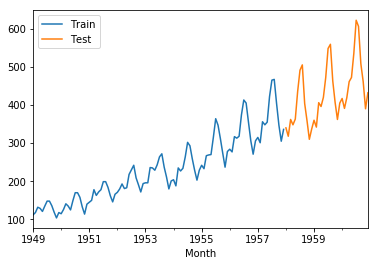

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

url = 'https://drive.google.com/uc?export=download&id=1eHbOq-2TqGx4d2jZXrUdwNnJY_aM_7rj'
df = pd.read_csv(url, index_col='Month',parse_dates=True)
df.index.freq= 'MS'
display(df.info())

# Train-test-split
train_data = df.iloc[:108] # Goes up to but not including 108
test_data = df.iloc[108:]


# Visualizing datasets before modeling
fig, ax=plt.subplots()
train_data.plot(ax=ax, label='Training Data',legend=False)
test_data.plot(ax=ax, label = 'Test Data',legend=False)
ax.legend(['Train','Test'])


#### Using Statsmodels.tsa.holtwinters' `ExponentialSmoothing`
- **Note to self:**
    - The forecast period was 3 times the length of the seasonal period (not sure of reason)
        - Since data has a seasonality/cycle that seems to restart ever 12 months ( and the data is in month frequency):
        - `seasonal_periods=12`
    - I had to add `.astype(np.float)` to get the model to fit without error

    
```python
## 
from statsmodels.tsa.holtwinters import Exponential Smoothing

# FIT THE MODEL
target_col='Thousands of Passengers'
fitted_model = ExponentialSmoothing(train_data[target_col], trend='mul',seasonal='mul',
seasonal_periods=12).fit()

# EVALUATE THE MODEL
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

# PLOT DATA AND PREDICTIONS
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');
```

    
- **Evaluation Metrics**
    - use mean absolute error, mean squared error, and root mean sequared error (np.sqrt of mean squared error)

```python
sfrom sklearn.metrics import mean_squared_error, mean_absolute_error


In [0]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# FIT THE MODEL
target_col='Thousands of Passengers'
fitted_model = ExponentialSmoothing(train_data[target_col].astype(np.float),trend='mul',seasonal='mul',seasonal_periods=12).fit()

# EVALUATE THE MODEL
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

from sklearn.metrics import mean_squared_error,mean_absolute_error
print('MAE: ',mean_absolute_error(test_data,test_predictions))
print('MSE: ',mean_squared_error(test_data,test_predictions))
print('RMSE: ',np.sqrt(mean_squared_error(test_data,test_predictions)))

MAE:  53.16361991340851
MSE:  3200.583445912333
RMSE:  56.57369924189449


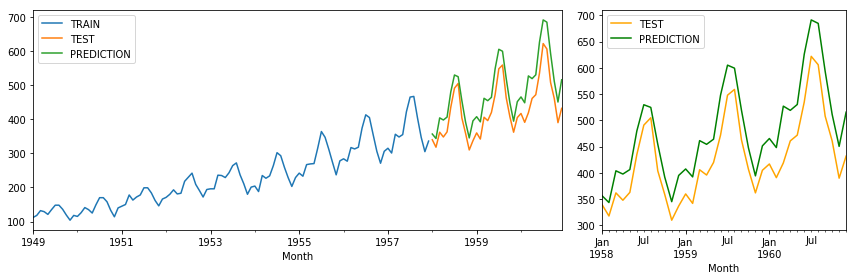

In [0]:
# PLOT DATA AND PREDICTIONS

# VISUALIZING FULL DATA & ZOOMED-IN ON PREDICTION DATA
fig,ax =  plt.subplots(figsize=(12,4))
ax=plt.subplot2grid(shape=(1,3),loc=(0,0),colspan=2, fig=fig)

train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',ax=ax)
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',ax=ax)#figsize=(12,8),
test_predictions.plot(legend=True,label='PREDICTION',ax=ax);

ax2 = plt.subplot2grid((1,3),(0, 2))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',ax=ax2,color='orange')#figsize=(12,8),
test_predictions.plot(legend=True,label='PREDICTION',ax=ax2,color='g');
ax2.set_xlim(min(test_predictions.index))
plt.tight_layout()

## Building up to ARIMA Models 


### Time Series Basics - Differencing

We can perform differenceing to remove trends from data. <br>
This will subtracts the data from itself at a specified lag (default is 1)

- **First Order Differencing - Methods**
    - **With pandas:**
        - use `df2['b'].diff()` method - easiest way 
            - note this will remove first row of data
            - Note that `df.diff(2)` is STILL first order diff, but with lag=2
    - **With stastmodels**
        - `statsmodels.tsa.statespace.tools` has a `diff` function too
        - `diff(df2['b'], k_diff=1)`

- ~~**Higher Order Differecing**~~[ ?]
    - Would need to call on `.diff()` repeatedly
        - `df.diff().diff()`
    

In [0]:
share_url ='https://drive.google.com/open?id=13u5MkNymLkukVHGtuyGtGqc3TPTODJNi'

# def make_gdrive_file_url(share_url_from_gdrive):
#     """accepts gdrive share url with format 'https://drive.google.com/open?id=`
#     and returns a pandas-usable link with format ''https://drive.google.com/uc?export=download&id='"""
#     import re
#     file_id = re.compile(r'id=(\w*)')
#     fid = file_id.findall(share_url)
#     prepend_url = 'https://drive.google.com/uc?export=download&id='
#     output_url = prepend_url + fid[0]
#     return output_url 


df2_url = make_gdrive_file_url(share_url)
df2=pd.read_csv(df2_url, index_col=0, parse_dates=True)
display(df2.head(2))

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31


In [0]:
# # PLOT THE DATA CONTENTS
# fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(16,4))
# df2['a'].plot(ax=ax[0],ylim=[0,100],title="STATIONARY DATA").autoscale(axis='x',tight=True);
# df2['b'].plot(ax=ax[1],ylim=[0,100],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);
# df2['c'].plot(ax=ax[2],ylim=[0,10000],title="MORE NON-STATIONARY DATA").autoscale(axis='x',tight=True);

### Time Series Basics - Discussing ACF/PACF 

- **ACF** describes autocorrelation between an observation and another observation at a prior time step.
    - This includes direct and indirect dependence of information
    
- **PACF**: plot relationship between previous days' residuals vs. te real values of the current day
    - PACF only describes relationship between an observation and its lag
    - The drops off very quickly
    
    - Note: for PACF, there are 2 main ways it can be calculated:
        - The Yule Walker method (YW)
        - the Least Ordinary Squares (OLS) method
    
    
- We will use these plots to help us judge what values to use for our ARIMA-based models
    - But in reality we will probably use a grid search and not the plots



In [0]:
passenger_data =make_gdrive_file_url("https://drive.google.com/open?id=1eHbOq-2TqGx4d2jZXrUdwNnJY_aM_7rj")
births_data = make_gdrive_file_url("https://drive.google.com/open?id=1Vn8XXVro0obbx0ZQr3D9LORLtchYW9NU")

df1 = pd.read_csv(passenger_data, index_col="Month",parse_dates=True)
df1.index.freq='MS'
df2 = pd.read_csv(births_data, index_col="Date",parse_dates=True)
df2.index.freq='D'

# fig,ax = plt.subplots(figsize=(14,4),ncols=2)
# df1.plot(ax=ax[0])
# df2.plot(ax=ax[1])

Text(0.5, 1.0, 'No Visible Correlation')

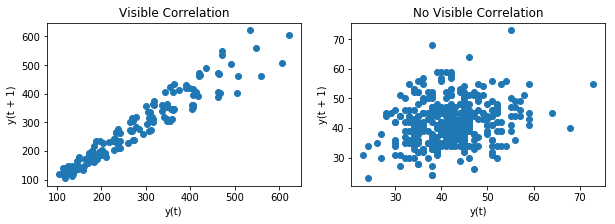

In [0]:
from pandas.plotting import lag_plot

fig,ax = plt.subplots(figsize=(10,3),ncols=2)

lag_plot(df1['Thousands of Passengers'],ax=ax[0])
lag_plot(df2['Births'], ax=ax[1])
ax[0].set_title('Visible Correlation')
ax[1].set_title('No Visible Correlation')

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


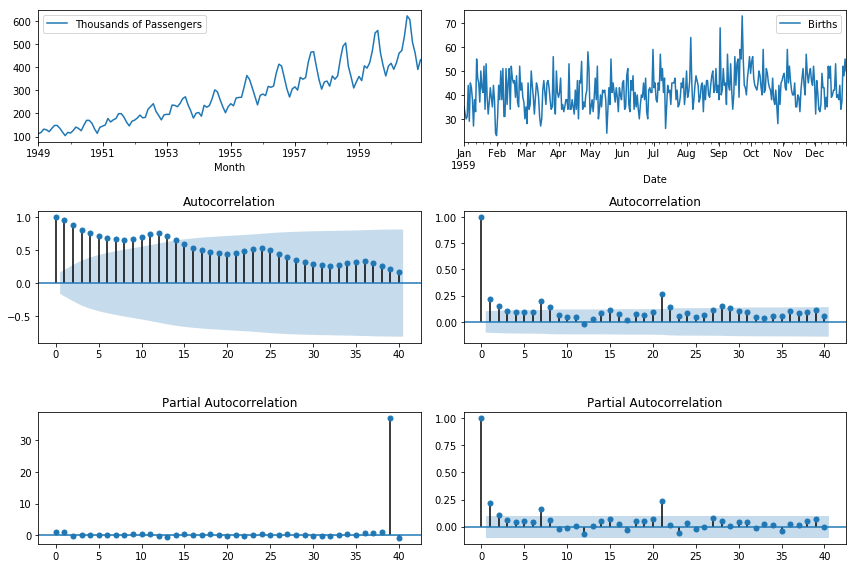

In [0]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(12,8))

df1.plot(ax=ax[0,0])
df2.plot(ax=ax[0,1])

plot_acf(df1,ax=ax[1,0], lags=40);
plot_acf(df2,ax=ax[1,1],lags=40);

plot_pacf(df1,ax=ax[2,0],lags=40);
plot_pacf(df2,ax=ax[2,1],lags=40);

plt.tight_layout()

## Introduction to ARIMA Models


We'll investigate a variety of different forecasting models in upcoming sections, but they all stem from ARIMA.

<strong>ARIMA</strong>, or <em>Autoregressive Integrated Moving Average</em> is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

<strong>Moving Averages</strong> we've already seen with EWMA and the Holt-Winters Method.<br>
<strong>Integration</strong> will apply differencing to make a time series stationary, which ARIMA requires.<br>
<strong>Autoregression</strong> is explained in detail in the next section. Here we're going to correlate a current time series with a lagged version of the same series.<br>
Once we understand the components, we'll investigate how to best choose the $p$, $d$ and $q$ values required by the model.



### ARIMA REQUIREMENTS/STEPS



- [ ] **Data must be stationary:** use stationarity tests (like ADFuller test) to test for stationary and transform data until it passes the tests by using the methods below:
    1. Use Differencing, can do repeatedly, but lose rows of data
    2. For seasonal data, you could difference by a SEASON instead of just 1 period
    3. For seasonal ARIMA models, combine both methods, taking the seasonal differnce of the first difference.
    
### p,d,q 

- p: the number of lags to include in the AR model.
- d: the number of times the raw observations are differenced
- q: the size of the moving average window AKA the order of the moving average

- **Picking the `p`,`d`,`q` terms for the model:**
    1. Tedious way: use the acf and pacf plots to asses which ones to use
    2. Use a Grid Search to test many combinations of p,d,q and find the ideal combination
    
    - **Using PACF and ACF: Rules of thumb:**
        - PACF:
            - A sharp drop off after lag # 'k' suggests k should be order for the AR-model
            - If there is a gradual decline, it suggests a MA model should be used.
        - ACF:
        - When to use which:
            - Identifying an AR model is best done with PACF
            - Identifying a MA model best done with _ACF_

### AR Models with `statsmodels.tsa.ar_model`


- US Population:
    - https://drive.google.com/open?id=1sBfxRrAL--acKKWVZCEFYThJeECANLud
    - index_col = 


```python
from statsmodels.tsa.ar_model import AR,ARResults


In [0]:
url = make_gdrive_file_url("https://drive.google.com/open?id=1sBfxRrAL--acKKWVZCEFYThJeECANLud")
df = pd.read_csv(url, index_col='DATE',parse_dates=True)
# df.head()

# split data
train = df.iloc[:84]
test = df.iloc[84:]

In [0]:
from statsmodels.tsa.ar_model import AR,ARResults

# FIT AR ORDER 1 MOEL
model = AR(train)

AR1fit = model.fit(maxlag=1)
# AR2fit = model.fit(maxlag=2)



## Lots of info as attributes of fit model
print('Model Order :',AR1fit.k_ar)
print('AIC :',AR1fit.aic)
print('\nparams: ')
print(AR1fit.params)

Model Order : 1
AIC : 6.410771237032229

params: 
const        284.913797
L1.PopEst      0.999686
dtype: float64


In [0]:
# MAKING PREDICTIONS WITH MODEL
start = len(train)
end = len(train) + len(test)-1

predictions1 = AR1fit.predict(start=start, end=end)
predictions1 = predictions1.rename('AR(1) Predictions')

# predictions2 = AR2fit.predict(start=start, end=end)
# predictions2 = predictions2.rename('AR(2) Predictions')

In [0]:
ARfit = model.fit(ic='aic')
print(ARfit.k_ar)

predictions2 = ARfit.predict(start=start, end=end).rename('AIC-Selected')
ARfit.params

10


const         92.313872
L1.PopEst      2.309054
L2.PopEst     -2.053715
L3.PopEst      1.381127
L4.PopEst     -1.183727
L5.PopEst      0.821019
L6.PopEst     -0.696891
L7.PopEst      0.723430
L8.PopEst     -0.363562
L9.PopEst      0.261208
L10.PopEst    -0.198199
dtype: float64

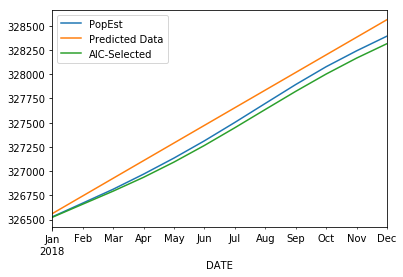

In [0]:
fig, ax = plt.subplots()
test.plot(ax=ax, label='True Data')
predictions1.plot(ax=ax, label='Predicted Data')
predictions2.plot(ax=ax, label='AIC-Selected')
plt.legend()

## EVALUATING TIME SERIES & FORECAST ACCURACY

### Evaluating Time Series
- **Granger Causality Tests**: hypothesis test to determine if one time series is useful in forecasting another.
    - Null hypothesis: 
        - In the case of two series, $y$ and $x$, the null hypothesis is that lagged values of $x$ do <em>not</em> explain variations in $y$.<br>
In other words, it assumes that $x_t$ doesn’t Granger-cause $y_t$.

- The stattools <tt><strong>grangercausalitytests</strong></tt> function offers four tests for granger non-causality of 2 timeseries

`from statsmodels.tsa.stattools import grangercausalitytests`

### Evaluating Forecast Accuracy
- **Mean Absolute Error, Mean Squared Error, Root Mean Squared Error**
    - A forecast method that minimizes the **MAE** will lead to **forecasts of the median**, while minimizing the **RMSE will lead to forecasts of the mean.**
    
- **AIC / BIC**
    - Akaike Information Criterion (AIC)
    - Bayesian Information Criterion (BIC)
    
The AIC evaluates a collection of models and estimates the quality of each model relative to the others. Penalties are provided for the number of parameters used in an effort to thwart overfitting. The lower the AIC and BIC, the better the model should be at forecasting.

These functions are available as

    from from statsmodels.tools.eval_measures import aic, bic

# TIME SERIES FORECASTING WITH NEURAL NETWORKS IN  KERAS


## MAKING A NEURAL NETWORK WITH TimeseriesGenerator



### INPUT DATA
- In order to use keras to forecast time series, data must be formatting a specific way.
    - X and y will come from the SAME 1D sequence.
        - X will contain a sliding window of a user-specified # of samples
        - y will contain the NEXT timepoint after X
- Use Keras's TimeSequence Generator:
    - `from keras.preprocessing.sequence import TimeseriesGenerator`
    - will generate the required X-sequences and y-labels AND will export it in the PROPER 3D FORMAT.

```python
from keras.preprocessing.sequence import TimeseriesGenerator
# Create Generator for Training Data
generator = TimeseriesGenerator(data=scaled_training_data, targets=scaled_training_data, length=n_input, batch_size=batch_size)
```
- **NOTE TO SELF RE: MORE X-FEATURES**
    - It looks as thought I can feed in ALL of my stock market features as data (including price) and then targets will be JUST the price data.
    


### INSTANTIATING THE `TimeseriesGenerator` 


   
  
```python
from keras.preprocessing.sequence import TimeseriesGenerator

# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
n_features= 1
batch_size = 1

# Create Generator for Training Data
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=batch_size)

# What does the first batch look like?
X,y = generator[0]

print(f'Given the Array: \t(with shape={X.shape}) \n{X.flatten()}')
print(f'\nPredict this y: \n {y}')
```

#### NOTES ON CHOICE OF INPUT SIZES
- `n_inputs` 
    - if you have clear seasonality, then have n_inupts>0 sesason
        - larger number of inputs requires LARGER NEURAL NETWORK (and more time)
- `n_features`
    - how many columns you have
    - usually 1 for timeseries analysis
- `batch_size`
    - how many time series batches it produces
    - for recurrent neural netwrork season data, 1 or super small is good. 


## SETTING UP & FITTING MODEL



  
```python
# More layers for model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

# fit model
model.fit_generator(generator,epochs=10,verbose=0)

```
### Using `callbacks` - EarlyStopping & ModelCheckpoint
* A `ModelCheckpoint` that saves the best weights for our model at any given time inside an `hdf5` file. This way, if our model's performance starts to degrade at any point, we can always reload the weights from a snapshot of when it had the best possible performance. 

* An `EarlyStopping` checkpoint, which will stop the training early if the model goes for a certain number of epochs without any progress. 
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

 For more information on the checkpoints we've created, see the [Keras callbacks documentation](https://keras.io/callbacks/#earlystopping).
 
 
 ```python
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

# specify filepath for checkpoint saving
checkpoints_path = 'weights_base.best.hdf5'
checkpoint = ModelCheckpoint(checkpoints_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# specify criteria for early stopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=25)

# combine callbacks into list
callbacks = [checkpoint, early_stopping]

# add callbacks to the model`.fit()`
model.fit(X_t, y, batch_size=32, epochs=1, validation_split=0.1, callbacks=callbacks) 
```


### Using your own loss functions 

```python
def my_rmse(y_true,y_pred):
    """RMSE calculation using keras.backend"""
    from keras import backend as kb
    sq_err = kb.square(y_pred - y_true)
    mse = kb.mean(sq_err,axis=-1)
    rmse =kb.sqrt(mse)
    return rmse

# add to the model`.compile()`
model.compile(loss=my_rmse, optimizer='adam', metrics=['acc', myrmse])#,my_rmse])#,my_rmse])#,metrics=['acc'])optimizer='adam',

```

### EVALUATING MODEL
- metrics from modeling are stored in `model.history.history`
```python
loss_per_epoch = model.history.history['loss']
print('Loss per epoch: ',loss_per_epoch)
plt.plot(range(len(loss_per_epoch)),loss_per_epoch);
```
#### NOTES ON SHAPE OF EVAL BATCH
- Need to match the 3 dimension shape of the input from the generator

```python
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
```



## NOTES ON FORECASTING INTO FUTURE



- Loop to get next prediction based on current eval_batch
- Append prediction to next eval batch and drop the oldest value in the current eval_batch
- To predict into the TRUE FUTURE, extend the `for i in range(len(test)):` line
    - replace range(len(test)) with however far you want to predict.
    - Data will get _much noisier_ farther out into TRUE future.

```python
test_predictions = []

# GETTING THE FIRST EVAL PATCH AND RESHAPING TO MATCH INPUT
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

# LOOP THROUGH ALL TEST DATA
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0] 
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # UPDATE BATCH TO INCLUDE CURRENT PREDICTION AND DROP OLDEST VALUE FROM ARRAY
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) # axis===ndim

print(test_predictions)

display(scaled_test)
```

# MOD 3 LEARN.CO  CONTINUED

# Distance Metrics & k-Nearest Neighbors


### Distance Metrics:
Distance helps us quantity similarity.
Distance can be measured in different metrics.
1. Manhattan Distance
    - Movement by X/Y blocks.
    - $d(x,y) =  \sum_{k=1}^n |x_k - y_k|$
        
    <img src="https://www.dropbox.com/s/0q217qlbc9xtb7t/manhattan-distance.png?raw=1" width=200>
2. Euclidian/Pythagorean Distance
    - Straight line (as-the-bird flies)
    - $d(x,y) = \sqrt{ \sum_{k=1}^n  (x_k - y_k)^2)}$
    
    <img src="https://www.dropbox.com/s/h3ogtkukgp6pwin/euclidean-distance.png?raw=1" width=250>
    
3. Minkowski distance
    - Generalized distance metric across a _Normed Vector Space_. 
        - Meaning each point has been through the same function.  Can be any function as long as:
            - A zero vector(just a vecotr of zeros) will output length=0
            - Every other vector has positive length.
        - Both Manhattan and Euclidian are actually special cases of Minkowski
    - $d(p,q) = (\sum_{i=1}^n (|p_i - q_i|)^c)^{1/c}$
    
    
    
```python 
# Manhattan Distance is the sum of all side lengths to the first power
manhattan_distance = (length_side_1 + length_side2 + ... length_side_n)**1  

# Euclidean Distance is the square root of the sum of all side lengths to the second power
euclidean_distance = np.sqrt((length_side_1 + length_side2 + ... length_side_n)*2)

# Minkowski Distance with a value of 3 would be the cube root of the sum of all side lengths to the third power
minkowski_distance_3 = np.cbrt((length_side_1 + length_side2 + ... length_side_n)**3)

# Minkowski Distance with a value of 5
mink_distance_5 = np.power((length_side_1 + length_side2 + ... length_side_n)**5, 1./5)
```


### K-Nearest Neighbors (KNN)
<img src="https://www.dropbox.com/s/77747858h369yzx/knn.gif?raw=1" width=500>
- **KNN is a supervised learning algorithm that can be used for both classification and regression.**
    - Distance-based, looks for the smaller distance between 2 points to identify similarity. 
        - Each column acts as a dimension. 
        - Can use any of the distance metrics discussed
    - since its supervised, must give it labeled training data. 
    
- **Fitting**
    - KNN does very little during the fit step, just stores the data and labels.
- **Predicting**
    - For each point, KNN calculates the distances to _every single point_ int he training set. 
    - It then finds the ```k``` closest neighbors, and examines their labels.
        - its 'democratic', in that each of the nearest points submits a vote as to which group it should belong to.
        - the group with the largest # of votes win. 
- **Evaluating Model Performance**
    - Evaluation is different depending on if using for classification or regression task.
    - Need a test set of data to compare its predicitons against to calc:
        - Precision
        - Recall
        - Accuracy
        - F1-Score

#### Confusion Matrices - to Evaluate Classification
For Example, using simply binary classification 0 or 1. 
<img src="https://www.dropbox.com/s/1kt3vniy7h1vodw/rf-conf-matrix.png?raw=1" width=300>

    
- **Confusion Matrices tell us 4 things:**
    - True Positives (TP): The model predicted the person has the disease (1), and they actually have the disease (1).

    - True Negatives (TN): The model predicted the person is healthy (0), and they are actually healthy (0).

    - False Positives (FP): The model predicted the person has the disease (1), but they are actually healthy (0). 

    - False Negatives (FN): The model predicted the person is healthy (0), but they actually have the disease (1).

- **To construct a confusion matrix, we need:**
    -  Predicitons for each data point in training or test set
    - Labels for same data points in that test set.
    
- To create a Confusion Matrix from scratch, we:
    1. Iterate through both lists and grab the item at the same the label and corresponding prediction.  
        - Note that `enumerate` is great here, since it gives us both an item and the index of that item from a list. 
    2. Use some control flow to determine if its a TP, TN, FP, or FN. 
    3. Store our results in a dictionary or 2-dimensional array. 
    4. Return our results once we've checked every prediction against its corresponding label. 
    
```python
def confusion_matrix(labels, predictions):
    conf_matrix = {"TP": 0, "FP": 0, "TN": 0, "FN": 0}
    for ind, label in enumerate(labels):
        pred = predictions[ind]
        if label == 1:
            # CASE: True Positive
            if label == pred:
                conf_matrix['TP'] += 1
            # CASE: False Negative 
            else:
                conf_matrix['FN'] += 1
        else:
            # CASE: True Negative
            if label == pred:
                conf_matrix['TN'] += 1
            # CASE: False Positive
            else:
                conf_matrix['FP'] += 1
    
    return conf_matrix
```

- **Confusion Matrices for Multi-Categorical Classificaitons:**
    - Diagonal represents true positives

<img src="https://www.dropbox.com/s/qgy3t90fyxztjni/cm2.png?raw=1" width=400>


#### Confusion Matrices with sklearn
- A nice positive of sklearn's implementation:
    - it automatically adjusts to the# of categories present in the labels.
    
```python
# Calcualate confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(example_labels, example_preds)

# Plot confusion matrix with matplotlib
import numpy as np
import itertools
import matplotlib.pyplot as plt
% matplotlib inline

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

show_cf(example_labels, example_preds)
```




### Evaluation Metrics [BOOKMARK]
- **Precision**
$$Precision = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}}$$

- Confusion Matrix: 
$$ Precision =

- **Recall**
$$Recall = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}}$$ 

 Precision and Recall have an inverse relationship.  As our recall goes up, our precision will go down, and vice versa. If this doesn't seem intuitive, let's examine this.
 
<img src="https://www.dropbox.com/s/p7yy1t34lx9k82j/Precisionrecall.png?raw=1" width=400>


- **Accuracy**

$$Accuracy = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}}$$

- **F-1 Score**

$$F1-Score = 2\ \frac{Precision\ x\ Recall}{Precision + Recall}$$


- **How to decide which metric to use?**
    - Its going to vary by question/field. 
    - When in doubt calculate them all.


## Graph Theory

>A "Graph" in mathematical and computer science terms consists of "Nodes" or "Vertices". Nodes/Vertices may or may not be connected with one another. The connecting line between two nodes is called an "edge". 

- Linked Refs:
    - [Graph Theory Basics](https://www.geeksforgeeks.org/mathematics-graph-theory-basics-set-1/)
    - [A Gentle Intro to Graph Theory](https://medium.com/basecs/a-gentle-introduction-to-graph-theory-77969829ead8)

### Graph Components  and Characteristics

<img src="https://www.dropbox.com/s/s73t4jezg0wz6ml/Nodes%20and%20Edges.png?raw=1" width =250>

- **Basic Pieces of a Graph**
    - __Node / Vertex__: The entity of analysis which has a relationship. 
        Node is used in the network context, vertex is used in the graph theory context, but commonly interchanged.

    - __Link / Edge / Relationship__: The connections between the nodes.
        Link is used in the network context, edge is used in the graph theory context, and all words are used interchangably with *relationship*.

    - __Attributes__: Both nodes and edges can store attributes, which contain additional data about that object.

    - __Weight__: A common *attribute* of edges, used to indicate *strength* or *value* of a relationship.

- **Terminology**
    - Adjacent Nodes:
        - Node v is adjacent to node u if and only if there exists an edge between u and v.

    - Path:
        - A path of length n from node u to note v is defined as sequence of n+1 nodes.
        $$P(u,v)=(v0,v1,v2,v3…….vn)$$
   
    - Degree of a node:
        - In undirected graph
            - A node's **degree** is the  # of nodes 'incident upon' the node. (AKA connected).
        - In a directed graph,
            - a node's **Indegree** is the # of arriving edges to the node
            - **Outdegree** is the # of departing edges. 
    - Isolated Nodes
        - Have no connection (degree=0)
        - Isolated nodes cannot be found by _breadth first search_ (BFS)
        
<img src="https://www.dropbox.com/s/6ssw6smhwsntktw/deg.png?raw=1" width=500>    

- **Graph Thoery Summary**

<img src="https://www.dropbox.com/s/g5sxt0udv7wkbck/summary.png?raw=1" width=700>


|                | Absent     | Present  |
|----------------|------------|----------|
| __Weights__ | Unweighted | Weighted |
| __Directionality__ | Undirected | Directed |


### Graphs in Python with NetworkX


## Model Evaluation 
- Prec

## Logistic Regression

-

# Decision Trees (Sect 31-32)


## PAC Learning Theory
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-3-31-02-introduction-to-PAC-learning-theory-online-ds-ft-021119/master/pac1.png" width=300 justify='middle'>
> The PAC is a learning models which is characterized by __learning from examples__. 

- Consider $f$ as the target function to be __learnt__,<br> the __learner__ (the computational model) is provided with some random examples<br> in the form of $(X,f(X))$.

    - Here, $X$ is a binary input instance of length $n$, and $f(X)$ is the value (boolean TRUE or FALSE) of the target function at that instance. 

- The __learner must succeed__ in deducing the target function $f$:

$$f : [0, 1]^n → {0, 1}$$. 



> __PAC learning approach places an upper bound on the probability of error by placing a lower bound on the number
of examples required to learn the target function.__

- PAC gives 
    - an upper bound on the error in accuracy with which h approximates f and 
    - the probability of failure in achieving this accuracy. 

With these quantities, we an express the definition of a PAC Algorithm with more mathematical clarity. 

> __For PAC Learnability, the learner must find a concept $h$ such that the error between $h$ and $f$ with acceptable range with a predefined level of confidence.__ 


__There is some probability distribution $D$, defined in the sample sample $[0,1]|^n$ giving probability of each example.__ 

The distribution $D$, conveniently and mathematically quantifies the error with which $h$ approximates $f$ as shown below:

$$err(h, f) ≡ P_{x∈D}(h(x) \neq f(x))$$

$P_{x∈D}$ reflects the probabilities are taken with respect to random draws over $D$ __only__.

## Entropy
if we have a sample containing $N$ items falling into two categories, $n$ observations having a target=1 and $m=N-n$ observations will have a target label 2. 

So what we want to do is group these observations according to the target class they belong to. We can write 
down the ratio of each class as:


$$p = n/N - (class 1)$$ $$q = m/N = 1-p - (class 2)$$

Based on this , the entropy of the complete dataset, before the split is calculated as:

$$E = -p . log_2(p) - q . log_2(q)$$

Above equation tells us that according to entropy law, a dataset is considered tidy if it only contains one class (i.e. no uncertainty or confusion). If there is a mix of classes in the target variable , the entropy (or uncertainty about data) goes high.

### Generalization of Entropy
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-3-31-04-entropy-information-gain-online-ds-ft-021119/master/entg.jpeg" width=800>

### Information Gain
$$Information~Gain  = Entropy_{parent} - Entropy_{child}.[child ~weighted ~average]$$

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-3-31-04-entropy-information-gain-online-ds-ft-021119/master/data.jpeg' width=150>

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-3-31-04-entropy-information-gain-online-ds-ft-021119/master/IG.jpeg" width=1000>


#### Example of Entropy and Infromation gain
**Predicting if the game will be played**

**1. Calc Overall Entropy**<br>
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-3-31-04-entropy-information-gain-online-ds-ft-021119/master/ex1.jpeg" width =300><br>
**2.Calc Entropy and Information Gain for All Attributes**
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-3-31-04-entropy-information-gain-online-ds-ft-021119/master/calc.jpeg" width=800>


<img src="https://raw.githubusercontent.com/learn-co-students/dsc-3-31-04-entropy-information-gain-online-ds-ft-021119/master/split.jpeg" width=500>

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-3-31-04-entropy-information-gain-online-ds-ft-021119/master/split2.jpeg" width=800>



<img src="https://raw.githubusercontent.com/learn-co-students/dsc-3-31-04-entropy-information-gain-online-ds-ft-021119/master/final.jpeg" width=800>

## How to visualize trees with graph_viz
- From Building Trees using scikit-learn

- Important code below, followed by entire code to show example 

```python
# Requried for visualization:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Tree creation code excluded...

# Visualize the tree trained from complete dataset
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
```

- **To import csv from git**

```python
# Import csv from git ----------------------------------------------- #
import pandas as pd
import io
import requests
url = 'https://raw.githubusercontent.com/jirvingphd/dsc-3-31-06-decision-tree-scikitlearn-codealong-online-ds-ft-021119/master/tennis.csv'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
df.head()

```

### Building Trees with sklearn - lesson

In [0]:
# Basic imports
import pandas as pd
import numpy as np

# Decision Tree And Accuracy Metrics 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree

# Preprocessing and LabelEncoder
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import LabelEncoder

# Requried for visualization:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Import csv from git ----------------------------------------------- #
import pandas as pd
import io
import requests
url = 'https://raw.githubusercontent.com/jirvingphd/dsc-3-31-06-decision-tree-scikitlearn-codealong-online-ds-ft-021119/master/tennis.csv'
s=requests.get(url).content

df=pd.read_csv(io.StringIO(s.decode('utf-8')))
# df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [0]:
lb=LabelEncoder()
# Make labels for each series
df['play_'] = lb.fit_transform(df['play'])
df['outlook_'] = lb.fit_transform(df['outlook'])
df['temp_'] = lb.fit_transform(df['temp'])
df['humidity_'] = lb.fit_transform(df['humidity'])
df['windy_'] = lb.fit_transform(df['windy'])

# Make X, Y out of labeled series
X =  df[['outlook_','temp_','humidity_','windy_']]
Y = df['play_']

# One hot encode X 
enc = preprocessing.OneHotEncoder()
enc.fit(X)
onehotX = enc.transform(X).toarray()

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(onehotX, Y, test_size=0.3, random_state=10)

# Train the decision tree
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [0]:
# Calculate accuracy
acc = accuracy_score(y_test,y_pred)*100
print("Accuracy is :{0}".format(acc))

# Check the AUC for predictions 
falst_positive_rate, true_positive_rate,thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(falst_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

# # Create and print a confusion matrix 
# print('\nConfusion Matrix')
# print('----------------')
# # pd.crosstab(y_test, y_pred, rownames=['True'],colnames=['Predicted'],margins=True)

Accuracy is :80.0

AUC is :0.88


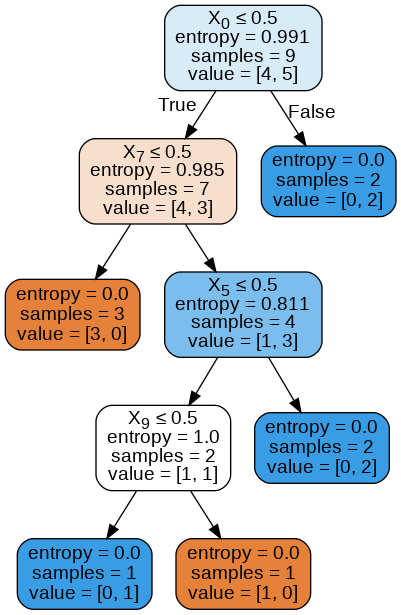

In [0]:

# Visualize the tree trained from complete dataset
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Pruning Trees / Hyperparameter Tuning
We can prune our trees using the following parameters:

- ```max_depth```

    - Reduce the depth of the tree to build a generalized tree. Set the depth of the tree to 3, 5, 10 depending after verification on test data
    - Too deep = overfitting, too shallow = underfitting
    - Related to computational cost
    - Try tuning this first. 

-  ```min_samples_split```
    - Minimum Samples Leaf with Split`
    - Restrict the size of sample leaf
    - Related to computational cost

- ```min_samples_leaf```
    - Minimum Leaf Sample Size `

    - Size in terminal nodes can be fixed to 30, 100, 300 or 5% of total

- `Maximum Leaf Nodes`

    - Reduce the number of leaf nodes

- `Maximum Features`

    - Maximum number of features to consider when splitting a node
    
    
    
#### Additional Resources 
- [Overview of Hyperparameter Tuning ](https://cloud.google.com/ml-engine/docs/tensorflow/hyperparameter-tuning-overview)
- [Demystifying Hyperparameter Tuning](https://towardsdatascience.com/demystifying-hyper-parameter-tuning-acb83af0258f)
- [Pruning Decision Trees](https://www.displayr.com/machine-learning-pruning-decision-trees/)


### My Code for Testing and Plotting hyperparameters

```python

def calc_roc_auc(X_test,y_test,dtc,verbose=False):
    """Tests the results of an already-fit classifer. 
    Takes X_test, y_test, classifer, verbose (True" print result)
    Returns the AUC for the roc_curve as a %"""
    y_pred = dtc.predict(X_test)

    FP_rate, TP_rate, thresh = roc_curve(y_test,y_pred)
    roc_auc = auc(FP_rate,TP_rate)
    roc_auc_perc = round(roc_auc*100,3)
    # Your code here 
    if verbose:
        print(f"roc_curve's auc = {roc_auc_perc}%")
    return roc_auc_perc

def tune_params(param_name, param_values):
    """Takes in param_name to tune with param_values, plots train vs test AUC's. 
    Returns df_results and df_style with color coded results"""
    res_list = [[param_name,'train_roc_auc','test_roc_auc']]

    # Loop through all values in param_values
    for value in param_values:
        # Create Model, set params
        dtc_temp = DecisionTreeClassifier(criterion='entropy')
        params={param_name:value}
        dtc_temp.set_params(**params)

        # Fit model
        dtc_temp.fit(X_train, y_train)
        
        # Get roc_auc for training data
        train_roc_auc = calc_roc_auc(X_train,y_train,dtc_temp)
        # Get roc_auc for test data
        test_res_roc_auc = calc_roc_auc(X_test,y_test,dtc_temp)
        # Append value and results to res_list
        res_list.append([value,train_roc_auc,test_res_roc_auc])

    # Turn results into df_results (basically same as using list2df)
    df_results = pd.DataFrame(res_list[1:],columns=res_list[0])
    df_results.set_index(param_name,inplace=True)
    
    # Plot df_results
    df_results.plot()
        
    # Color-coded dataframe s
    import seaborn as sns
    cm = sns.light_palette("green", as_cmap=True)
    df_syle = df_results.style.background_gradient(cmap=cm)#,low=results.min(),high=results.max())

    return df_results, df_syle


## How to use:
# Identify the optimal tree depth for given data
depths = np.array(range(1,33))
param_name = 'max_depth'
results, s = tune_params('max_depth',depths)
s
```

## Regression with CART trees

>The CART algorithm builds a *binary tree* in which every non-leaf node has exactly two children (corresponding to a yes/no answer). 

Given a set of training examples and their labels, the algorithm repeatedly splits the training examples $D$ into two subsets $D_{left}, D_{right}$ using some feature set $f$ and feature threshold $t_f$ such that samples with the same label are grouped together. 

At each node, the algorithm selects the split $\theta = (f, t_f)$ that produces the smallest *mean squared error* (MSE) (alternatively, we could use the mean absolute error).

So at each step, the algorithm selects the parameters $\theta$ that minimize the following cost function:

\begin{equation}
J(D, \theta) = \frac{n_{left}}{n_{total}} MSE_{left} + \frac{n_{right}}{n_{total}} MSE_{right}
\end{equation}

- $D$: remaining training examples   
- $n_{total}$ : number of remaining training examples
- $\theta = (f, t_f)$: feature and feature threshold
- $n_{left}/n_{right}$: number of samples in the left/right subset
- $MSE_{left}/MSE_{right}$: MSE of the left/right subset

This step is repeated recursively until the *maximum allowable depth* is reached or the current number of samples $n_{total}$ drops below some minimum number.

#### Mean Squared Error (MSE)

When performing regression with CART trees (i.e. the target values are continuous) we can evaluate a split using its MSE. The MSE of node $m$ is computed as follows:

\begin{equation}
\hat{y}_m = \frac{1}{n_{m}} \sum_{i \in D_m} y_i
\end{equation}
\begin{equation}
MSE_m = \frac{1}{n_{m}} \sum_{i \in D_m} (y_i - \hat{y}_m)^2
\end{equation}

- $D_m$: training examples in node $m$
- $n_{m}$ : total number of training examples in node $m$
- $y_i$: target value of $i-$th example

#### Additional References for Regression w CART Trees 
- [An Introduction to Recursive Partitioning: Rationale, Application and Characteristics of Classification and Regression Trees, Bagging and Random Forests](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2927982/)
- [CART: Classification And Regression Trees for Machine Learning](https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/)
- [Popular Decision Tree: Classification and Regression Trees (C&RT)](http://www.statsoft.com/Textbook/Classification-and-Regression-Trees)
- [Youtube: CART trees](https://www.youtube.com/watch?v=DCZ3tsQIoGU)

# Random Forests


### Benefits

* **_Strong performance_**: The Random Forest algorithm usually has very strong performance on most problems, when compared with other classification algorithms. Because this is an ensemble algorithm, the model is naturally resistant to noise and variance in the data, and generally tends to perform quite well. 

* **_Interpretability_**:  Conveniently, since each tree in the Random Forest is a **_Glass-Box Model_** (meaning that the model is interpretable, allowing us to see how it arrived at a certain decision), the overall Random Forest is, as well! You'll demonstrate this yourself in the upcoming lab, by inspecting feature importances for both individual trees and the entire Random Forest itself. 

### Drawbacks

* **_Computational Complexity_**: Like any ensemble method, training multiple models means paying the computational cost of training each model. On large datasets, the runtime can be quite slow compared to other algorithms.

* **_Memory Usage_**: Another side effect of the ensembled nature of this algorithm, having multiple models means storing each in memory. Random Forests tend to have a larger memory footprint that other models. Whereas a parametric model like a Logistic Regression just needs to store each of the coefficients, a Random Forest has to remember every aspect of every tree! It's not uncommon to see larger Random Forests that were trained on large datasets have memory footprints in the 10s, or even hundreds of MB. For data scientists working on modern computers, this isn't typically a problem--however, there are special cases where the memory footprint can make this an untenable choice--for instance, an app on a smartphone that uses machine learning may not be able to afford to spend that much disk space on a Random Forest model!
